### Fast AI Deep Learning  NB 1

In [1]:
# which makes sure any updates to the underlying library at any point of time 
#should be automatically reloaded/refreshed. 

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# import fastai libraries

from fastai import *
from fastai.vision import *

In [4]:
# get that data

path = untar_data(URLs.PETS)
path

PosixPath('/home/dckap/.fastai/data/oxford-iiit-pet')

URLs is a class from fastai. datasets, we imported it as from fastai import *

PETS is a string constant with the path as https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet

In [6]:
# list out the items in the path
path.ls()

[PosixPath('/home/dckap/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/dckap/.fastai/data/oxford-iiit-pet/annotations')]

In [8]:
# pathlibs are much better to use than strings

path_anno = path/'annotations'
path_img = path/'images'

In [9]:
path_img

PosixPath('/home/dckap/.fastai/data/oxford-iiit-pet/images')

In [10]:
# get_image_files will just grab an array of all of the image files based on extension in a path.
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/dckap/.fastai/data/oxford-iiit-pet/images/Sphynx_54.jpg'),
 PosixPath('/home/dckap/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_65.jpg'),
 PosixPath('/home/dckap/.fastai/data/oxford-iiit-pet/images/saint_bernard_127.jpg'),
 PosixPath('/home/dckap/.fastai/data/oxford-iiit-pet/images/havanese_79.jpg'),
 PosixPath('/home/dckap/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_65.jpg')]

In [11]:
# Here is the regular expression that extract the label for this dataset:

np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [12]:
# Loads the train, val & test data and applies transformations.


# There is a class called ImageDataBunch from fastai.vision.data, 
# which will hold all the data you need an i.e train, val sets.


data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sphynx,yorkshire_terrier,saint_bernard,Birman,Birman
Path: /home/dckap/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Birman,beagle,Birman,scottish_terrier,Sphynx
Path: /home/dckap/.fastai/data/oxford-iiit-pet/images;

Test: None

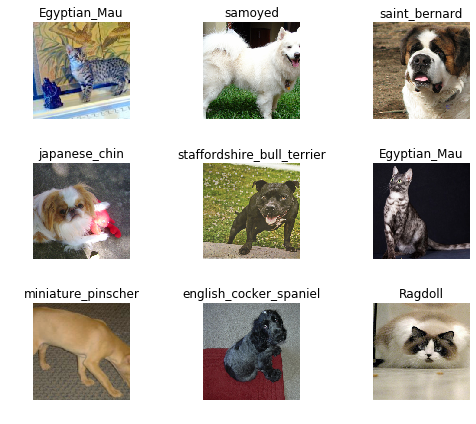

In [15]:
# show data

data.show_batch(rows=3, figsize=(7,6))

In [23]:
# labels

print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [33]:
# Training a model using resnet architecture

#resnet works well with almost all the image classification problems, you need to just care about 
# how big architecture is. In resnet34, 34 signifies the number of layers in the model architecture.
#we will also use resnet50 ahead.

learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [34]:
#summary of the model
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [35]:
# using one cycle method to fit the model

learn.fit_one_cycle(4) #no_of_epochs

epoch,train_loss,valid_loss,error_rate,time
0,1.386025,0.316506,0.099459,01:05
1,0.567036,0.232767,0.075101,01:06
2,0.348740,0.213988,0.079161,01:07
3,0.256087,0.194468,0.066982,01:07


In [36]:
# this will save the model as .pth format, which is Pytorch’s default serialization method.
#Models will get saved into your local dir in /models folder

learn.save('stage-1')

In [37]:
# Analyzing results

#It’s important to see what comes out of our model. We have seen one way of what goes in,
#now let’s see what our model has predicted.
#Jeremy says this is the other thing you need to get good at.
# This class has methods for creating confusion matrix as well as plotting misclassified images.

interp = ClassificationInterpretation.from_learner(learn)

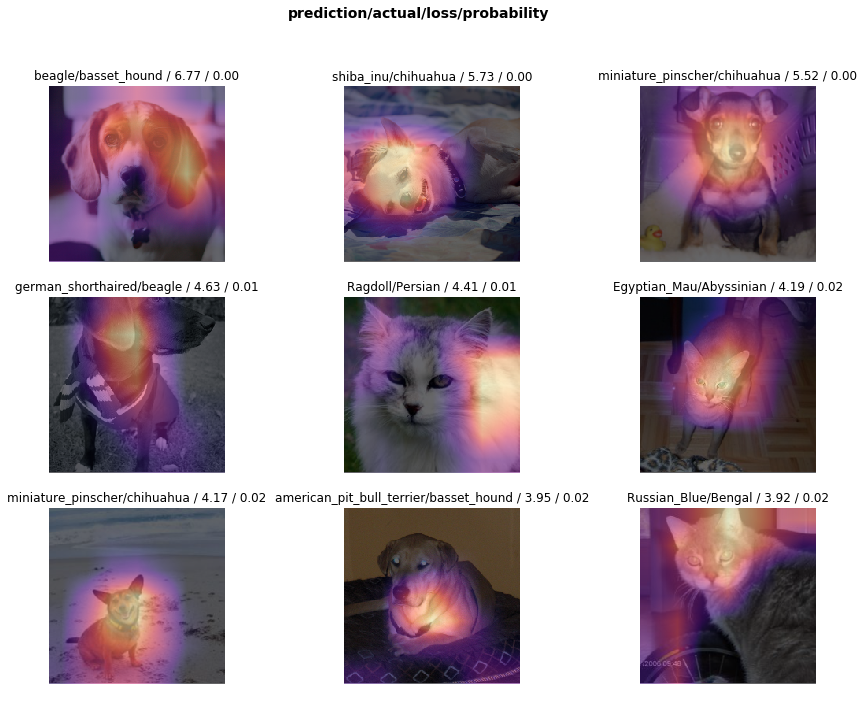

In [38]:
# plot top losses

interp.plot_top_losses(9, figsize=(15,11))

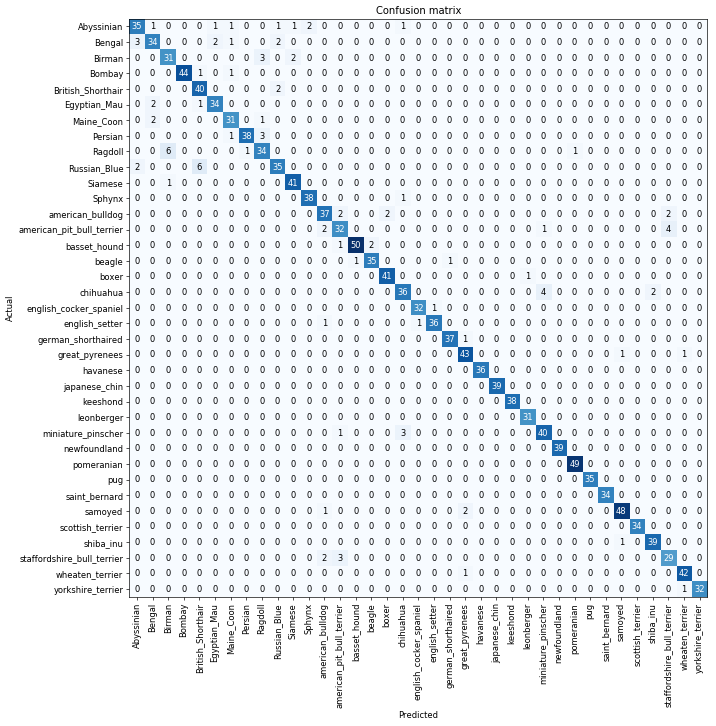

In [39]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [40]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 6),
 ('Russian_Blue', 'British_Shorthair', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Birman', 'Ragdoll', 3),
 ('Persian', 'Ragdoll', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Sphynx', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Bengal', 'Russian_Blue', 2),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'boxer', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('basset_hound', 'beagle', 2),
 ('chihuahua', 'shiba_inu', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

### Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will unfreeze our model and train some more.

In [41]:
# unfreeze 
learn.unfreeze()

In [42]:
# find learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Text(0.5, 1.0, 'Loss Vs Learning Rate')

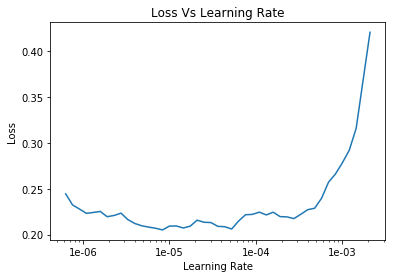

In [45]:
learn.recorder.plot()
plt.title("Loss Vs Learning Rate")

In [46]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.236553,0.189800,0.066982,01:27
1,0.203135,0.184639,0.066306,01:30
